# Try this exercise

In this exercise, you can play with the "digits" data set.  That can be loaded from sklearn as shown below.

*At a minimum* do the classification experiement on this data set as above using the default values.

If you feel like it, you can try to optimize the classifier by varying the parameters (including learning rate, if you want to).  Do stick with the same basic architecture, though.  Perhaps we could have a competition for the most efficient classifier?

In [2]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 10
figsize = (2,2)
dpi = 150

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 300x300 with 0 Axes>

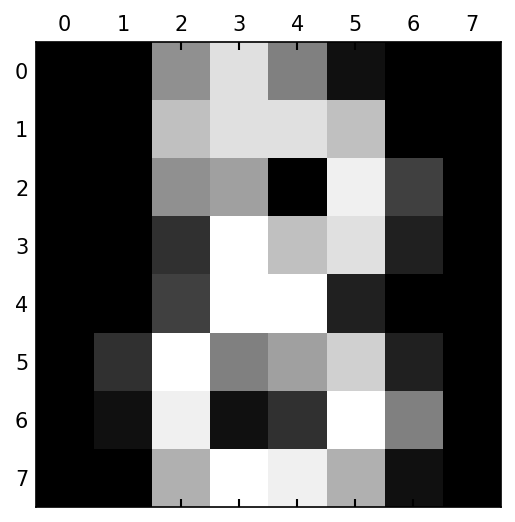

In [6]:
plt.gray() 
plt.matshow(digits.images[8])

In [7]:
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

From lecture:
"It turns out that `digits` is a dictionary with:
- data - this has the data in vectorized form, so we'll use that.
- DESCR
- images - this is the data as an 8x8 image
- target - the target - we'll use this too.
- target_names - the target names = target.  "

In [8]:
# Initilize data
data_digits=digits.data
target_digits=digits.target


In [25]:
print(digits.target_names)
print(digits.target)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [9]:
# Import TensorFlow and helper functions
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# Preprocess the data

data_scale = data_digits / 16      # Scale


data_scale_train, data_scale_test, class_train, class_test  = train_test_split(data_scale, target_digits, test_size=.4, random_state=42)    # Split into train and test





In [30]:
# Inspect
print(data_scale_train)
print(class_train)
print(len(data_scale_train))
print(len(class_train))

print(np.max(data_scale))

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.125  ... 1.     0.125  0.    ]
 [0.     0.     0.375  ... 0.625  0.0625 0.    ]
 ...
 [0.     0.     0.5625 ... 1.     0.125  0.    ]
 [0.     0.     0.0625 ... 0.     0.     0.    ]
 [0.     0.     0.0625 ... 0.0625 0.     0.    ]]
[7 6 0 ... 2 7 1]
1078
1078
1.0


In [12]:
data_scale_train.shape

(1078, 64)

Now we can set up the model. We have 10 digits we need to be able to identify so we set up our output layer to be of size 10.

In [52]:
# Setup the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(10)
])



In [53]:
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# Train the model
model.fit(data_scale_train, class_train, epochs=10)

Train on 1078 samples
Epoch 1/10
1078/1078 [==============================] - 1s 1ms/sample - loss: 1.7679 - accuracy: 0.6141
Epoch 2/10
1078/1078 [==============================] - 0s 205us/sample - loss: 0.8229 - accuracy: 0.8887
Epoch 3/10
1078/1078 [==============================] - 0s 181us/sample - loss: 0.4398 - accuracy: 0.9230
Epoch 4/10
1078/1078 [==============================] - 0s 228us/sample - loss: 0.3102 - accuracy: 0.9406
Epoch 5/10
1078/1078 [==============================] - 0s 225us/sample - loss: 0.2343 - accuracy: 0.9601
Epoch 6/10
1078/1078 [==============================] - 0s 224us/sample - loss: 0.1969 - accuracy: 0.9592
Epoch 7/10
1078/1078 [==============================] - 0s 222us/sample - loss: 0.1660 - accuracy: 0.9601
Epoch 8/10
1078/1078 [==============================] - 0s 192us/sample - loss: 0.1461 - accuracy: 0.9731
Epoch 9/10
1078/1078 [==============================] - 0s 191us/sample - loss: 0.1239 - accuracy: 0.9750
Epoch 10/10
1078/1078 [===

In [55]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(data_scale_test,  class_test, verbose=2)

print('\nTest accuracy:', test_acc)

719/1 - 0s - loss: 0.1081 - accuracy: 0.9708

Test accuracy: 0.9707928


In [56]:
# Make some predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [57]:
predictions = probability_model.predict(data_scale_test)

In [61]:
img = data_scale_test[45]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

In [62]:
# Inspect probabilities
print(predictions_single)

[[5.7217630e-07 9.9009144e-01 3.0322084e-05 6.2100688e-04 1.3014821e-04
  6.3179745e-05 1.9027706e-05 1.2991332e-05 8.5076522e-03 5.2362593e-04]]


Looks like the most likely probability for this image is the second classification, which should be the digit '1'. Let's inspect:

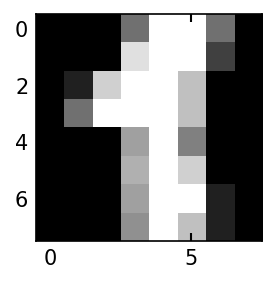

In [64]:
# Inspect
img_check = np.reshape(data_scale_test[45],(8,8))
plt.imshow(img_check)

Lo and behold, that looks like a '1' to me. How neat is that